<a href="https://colab.research.google.com/github/Mercyline-254/Project-hub/blob/main/mercy10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("price.csv")

data

,rooms,square_footage,age,location,year_built,price_ksh
0,bedsitter,590,5,Eldoret,2016,5702.0
1,3 bedroom,480,23,Kisumu,1997,42181.0
2,1 bedroom,440,3,Kisumu,2019,29076.0
3,bedsitter,380,8,Kisumu,2012,5573.0
4,3 bedroom,870,46,Kisumu,1975,33502.0
...,...,...,...,...,...,...
995,bedsitter,320,17,Mombasa,2007,6907.0
996,bedsitter,1170,31,Kisumu,1993,9259.0
997,2 bedroom,790,14,Nairobi,2009,41754.0
998,1 bedroom,980,23,Mombasa,1998,14723.0


In [ ]:
data.head()

,rooms,square_footage,age,location,year_built,price_ksh
0,bedsitter,590,5,Eldoret,2016,5702.0
1,3 bedroom,480,23,Kisumu,1997,42181.0
2,1 bedroom,440,3,Kisumu,2019,29076.0
3,bedsitter,380,8,Kisumu,2012,5573.0
4,3 bedroom,870,46,Kisumu,1975,33502.0


In [ ]:
data.describe()

,square_footage,age,year_built,price_ksh
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,693.290000,24.992000,1996.938000,26066.769000
std,295.591695,14.133354,14.187016,18256.174648
min,200.000000,1.000000,1971.000000,0.000000
25%,430.000000,12.000000,1984.000000,9033.000000
50%,690.000000,25.000000,1997.000000,22721.500000
75%,970.000000,38.000000,2010.000000,40286.000000
max,1190.000000,49.000000,2023.000000,60000.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rooms           1000 non-null   object 
 1   square_footage  1000 non-null   int64  
 2   age             1000 non-null   int64  
 3   location        1000 non-null   object 
 4   year_built      1000 non-null   int64  
 5   price_ksh       1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
#checking for missing values
data.isnull()


,rooms,square_footage,age,location,year_built,price_ksh
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,False,False
996,False,False,False,False,False,False
997,False,False,False,False,False,False
998,False,False,False,False,False,False


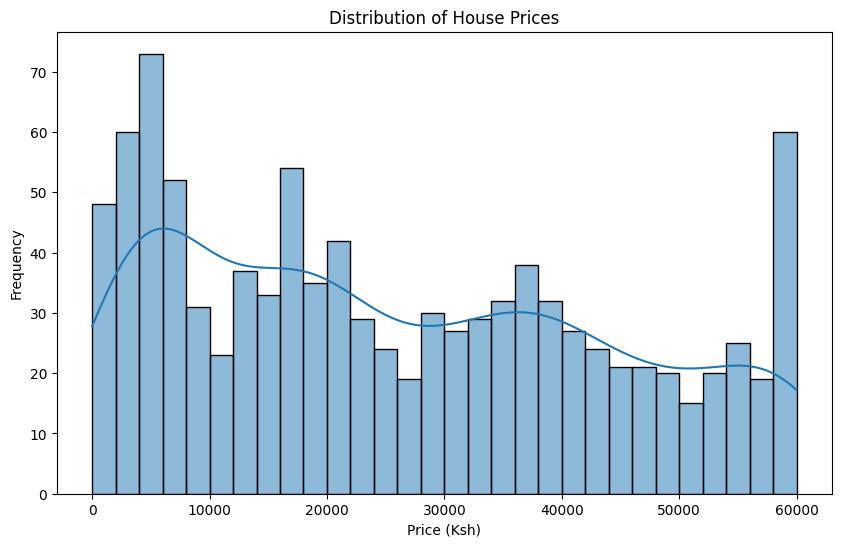

In [ ]:
#house prices graph
plt.figure(figsize=(10, 6))
sns.histplot(data['price_ksh'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price (Ksh)')
plt.ylabel('Frequency')
plt.show()


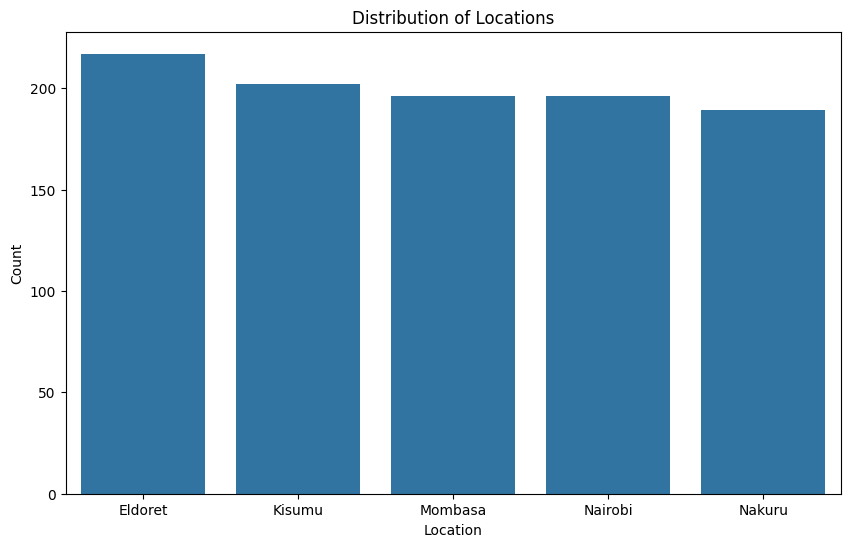

In [ ]:
#location
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=data)
plt.title('Distribution of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


In [ ]:
#libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np


In [ ]:
# Separate features and target variable
X = data.drop('price_ksh', axis=1)
y = data['price_ksh']

In [ ]:
# Define categorical and numerical columns
categorical_features = ['rooms', 'location']
numerical_features = ['square_footage', 'age', 'year_built']


In [ ]:
# Preprocessing pipelines for both numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Apply the preprocessing steps to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 3154.566776469662
Mean Squared Error (MSE): 15854154.888353476
Root Mean Squared Error (RMSE): 3981.7276260881376


In [ ]:
# Example new data for prediction
new_data = pd.DataFrame({
    'rooms': ['1 bedroom'],
    'square_footage': [900],
    'age': [5],
    'location': ['Nairobi'],
    'year_built': [2019]
})

# Apply preprocessing to new data
new_data_transformed = preprocessor.transform(new_data)

# Make predictions
new_price_prediction = model.predict(new_data_transformed)
print(f'Predicted Price: {new_price_prediction[0]} Ksh')


Predicted Price: 25196.70772364064 Ksh
